In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

C:\Users\yezon\AppData\Local\Temp\ipykernel_7260\798855051.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

df = pd.read_csv('../../data/combined_data/merged_052423.csv')

In [3]:
print(df.head())
print("Shape of the Dataset: {}".format(df.shape))

  country  sect     t source      outp     outpd    outptt      gvco  \
0     ABW     1  1990   eora  3.889417  1.009440  1.632360  1.247617   
1     ABW     1  1991   eora  4.737275  1.451135  1.938848  1.347292   
2     ABW     1  1992   eora  4.550254  1.134122  1.875140  1.540992   
3     ABW     1  1993   eora  5.093862  1.536173  2.006202  1.551487   
4     ABW     1  1994   eora  6.775789  2.075407  2.444015  2.256366   

     gvcobp    gvcofp  ...  opec  oilreserves_full  oilreserves  \
0  0.284422  0.037627  ...   0.0               NaN          NaN   
1  0.322020  0.069577  ...   0.0               NaN          NaN   
2  0.329202  0.038029  ...   0.0               NaN          NaN   
3  0.295577  0.065685  ...   0.0               NaN          NaN   
4  0.318675  0.236208  ...   0.0               NaN          NaN   

   oilreserves_public  milexp_pergdpSIPRI_diff  logpop_M_diff  \
0                 NaN                      NaN            NaN   
1                 NaN             

Best Params: {'alpha': 1e-05}


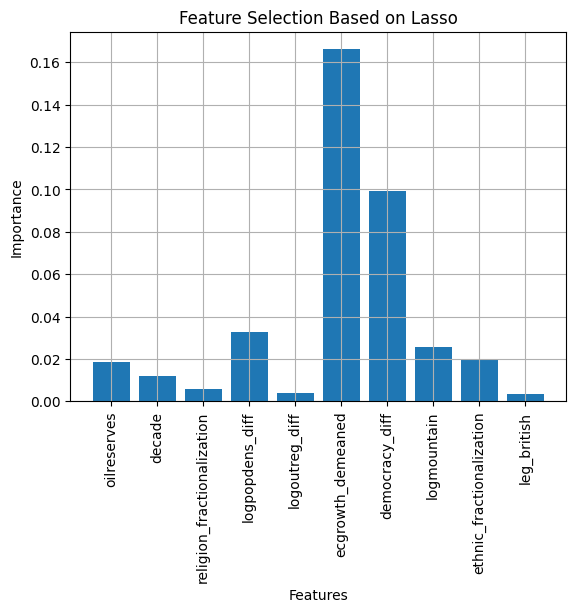

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import Lasso

def clean_data(df, feature_columns, target_columns):
    df_clean = df[feature_columns + target_columns]
    df_clean = df_clean.dropna()
    return df_clean

def get_features_targets(df_clean, feature_columns, target_name):
    x = df_clean[feature_columns].values
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)
    y = df_clean[target_name].values
    return x, y

def split_data(x, y, test_size=0.20, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

def perform_grid_search(x, y, params, cv_splits=5, random_state=42):
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
    lasso = Lasso()
    lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf)
    lasso_cv.fit(x, y)
    return lasso_cv.best_params_

def get_column_names(df, feature_columns):
    return df[feature_columns].columns

def fit_model(X_train, y_train, best_alpha):
    lasso = Lasso(alpha=best_alpha)
    lasso.fit(X_train, y_train)
    return lasso

def plot_feature_importance(names, coefficients):
    plt.bar(names, np.abs(coefficients))
    plt.xticks(rotation=90)
    plt.grid()
    plt.title("Feature Selection Based on Lasso")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show()

# Define columns
feature_columns = ['oilreserves', 'decade','religion_fractionalization',
                    'logpopdens_diff', 'logoutreg_diff', 'ecgrowth_demeaned', 'democracy_diff',
                   'logmountain', 'ethnic_fractionalization',
                   'leg_british']
target_columns = ['onset2COWCS']
# , 'oilreserves_full', 'oilreserves_public',,  'language_fractionalization',, 'opec''logpop_M_diff',

# Clean data
df_clean = clean_data(df, feature_columns, target_columns)

# Select target
target_name = 'onset2COWCS' # This can be changed to 'gvcofp' or 'gvcomix'

# Get features and target
x, y_bp = get_features_targets(df_clean, feature_columns, target_name)

# Split data
X_train, X_test, y_train, y_test = split_data(x, y_bp)

# Grid search parameters
params = {"alpha": np.arange(0.00001, 10, 0.1)} # Adjusted for a more sensible range

# Perform grid search
best_params = perform_grid_search(x, y_bp, params)
print("Best Params:", best_params)

# Get column names
names = get_column_names(df, feature_columns)

# Fit model
lasso_model = fit_model(X_train, y_train, best_params['alpha'])
# Plot feature importance
plot_feature_importance(names, lasso_model.coef_)



Analyzing target: onset2COWCS
Best Params: {'alpha': 1e-05}
Feature importances:
oilreserves: 0.018475644904773457
decade: -0.01213729882017858
religion_fractionalization: 0.005864800573918838
logpopdens_diff: -0.03289562227924686
logoutreg_diff: 0.0037478327419927806
ecgrowth_demeaned: -0.16611270948060824
democracy_diff: -0.0992648921378906
logmountain: 0.025763834292582367
ethnic_fractionalization: 0.01947280733676473
leg_british: 0.0034189814122739847


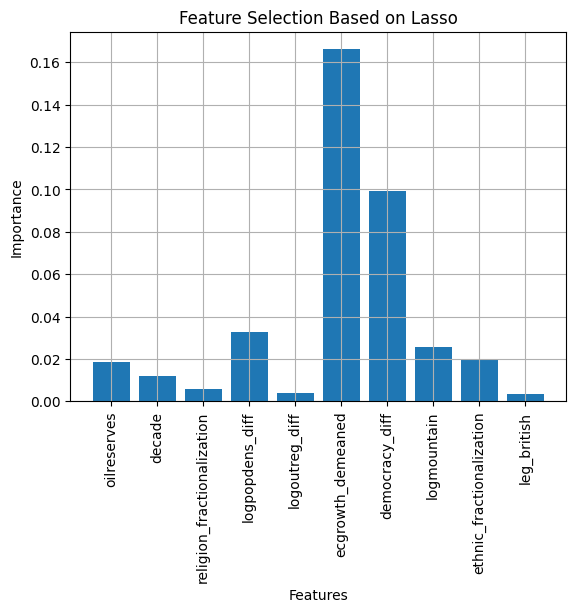

In [5]:
from sklearn.preprocessing import MinMaxScaler

def print_feature_importance(names, coefficients):
    for name, coef in zip(names, coefficients):
        print(f"{name}: {coef}")

# Loop through each target column
for target_name in target_columns:
    print(f"\nAnalyzing target: {target_name}")

    # Get features and target
    x, y = get_features_targets(df_clean, feature_columns, target_name)

    # Split data
    X_train, X_test, y_train, y_test = split_data(x, y)

    # Perform grid search
    best_params = perform_grid_search(x, y, params)
    print("Best Params:", best_params)

    # Fit model
    lasso_model = fit_model(X_train, y_train, best_params['alpha'])

    # Print and plot feature importance
    print("Feature importances:")
    print_feature_importance(names, lasso_model.coef_)
    plot_feature_importance(names, lasso_model.coef_)

In [6]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lasso_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

R-squared: 0.014839777387302688
RMSE: 0.13631234168095058
